In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
titanic_data = pd.read_csv(url)

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch(Parents/children aboard), and Fare to predict whether a passenger survived.__

In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

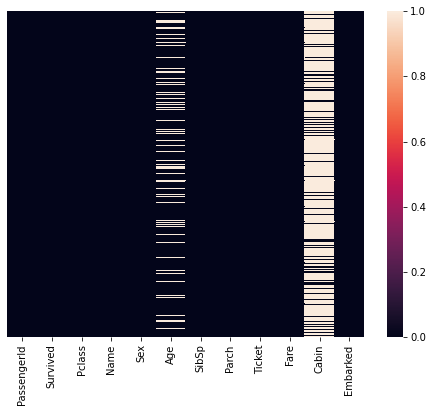

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(titanic_data.isnull(),yticklabels=False)

__Cabin column can be dropped as it is irrelevant__.

In [11]:
titanic_data = titanic_data.drop('Cabin',axis=1)

__We can see missing values in the age column we need tio handle these missing values.__

In [12]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data.Age.mean())

<AxesSubplot:>

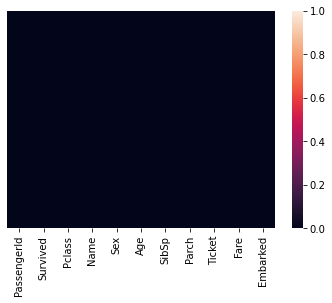

In [13]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

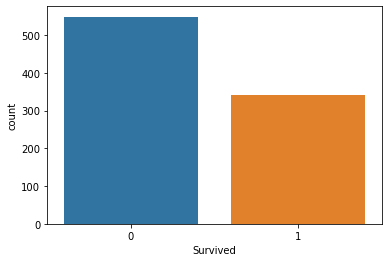

In [14]:
sns.countplot(titanic_data['Survived'])

C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

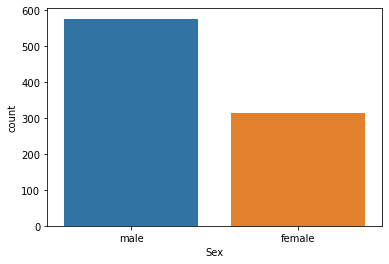

In [15]:
sns.countplot(titanic_data['Sex'])

C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


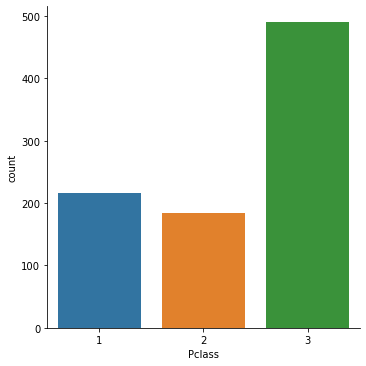

In [16]:
sns.factorplot('Pclass',data=titanic_data,kind='count')

__We can see that there are more passengers in class 3.__<br>
__We can check if there is some interesting connection between gender and class, as well as gender and survived and survived and class.__

C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


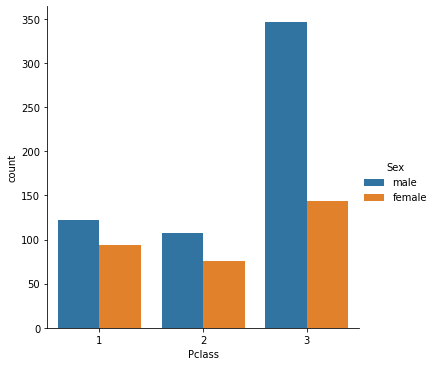

In [17]:
sns.factorplot('Pclass', data=titanic_data, hue='Sex',kind='count')

<AxesSubplot:>

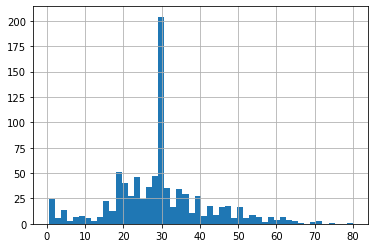

In [18]:
titanic_data['Age'].hist(bins=50)

C:\Users\rkpla\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


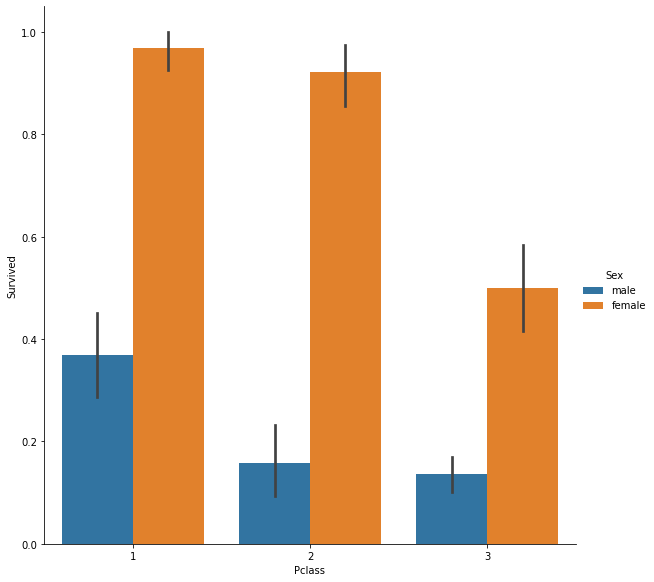

In [19]:
sns.factorplot(x='Pclass',y='Survived',data=titanic_data,kind='bar',height=8,hue='Sex')

In [20]:
X = titanic_data.drop(['PassengerId', 'Survived','Name', 'Ticket','Embarked'],axis=1)
y = titanic_data['Survived']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [22]:
X['Sex'] = pd.get_dummies(X['Sex'])

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    uint8  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [26]:
X_train.shape

(623, 6)

In [27]:
y_train.shape

(623,)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
dt_classifier.score(X,y)

0.9259259259259259

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
y_predict = dt_classifier.predict(X_test)

In [33]:
y_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [34]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_predict)))

Accuracy Score: 0.8022388059701493


In [35]:
print("Classification Report: {}".format(classification_report(y_test, y_predict)))

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.76      0.68      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [36]:
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_predict)))

Confusion Matrix: 
[[147  21]
 [ 32  68]]


__Model accuracy after Scaling X__

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

In [40]:
dt_classifier_new = DecisionTreeClassifier()
dt_classifier_new.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_predict_new = dt_classifier_new.predict(X_test)

In [42]:
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_predict_new)))

Confusion Matrix: 
[[149  19]
 [ 33  67]]


In [43]:
print("Accuracy Score: {}".format(accuracy_score(y_test, y_predict_new)))

Accuracy Score: 0.8059701492537313


__Hyperparameter Tuning__

In [44]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [45]:
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator=dt_classifier_new, param_grid = params, cv=5, n_jobs =-1)

In [46]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [47]:
grid_search_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'best'}

In [48]:
dt_classifier_hyper = DecisionTreeClassifier(criterion='entropy', max_depth= 23,
                                             min_samples_leaf= 4, min_samples_split= 7,
                                             splitter= 'random')
dt_classifier_hyper.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=4,
                       min_samples_split=7, splitter='random')

In [49]:
dt_classifier_hyper.score(X_test,y_test)

0.7947761194029851